<a href="https://colab.research.google.com/github/takakurahashi/github.io/blob/master/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

[[ -2.325  -6.7  ]
 [  0.519  -4.901]
 [  2.443   3.847]
 [  5.827  -9.923]
 [  2.033   5.29 ]
 [  3.38    4.189]
 [  6.048 -10.305]
 [ -0.421  -4.249]
 [  3.781   5.221]
 [  5.692  -7.2  ]
 [  5.159 -10.134]
 [  1.165   5.597]
 [  2.946   3.358]
 [  1.188  -5.561]
 [ -0.317  -6.863]
 [  4.33    5.644]
 [  4.29   -9.45 ]
 [  3.5     3.022]
 [  5.314  -9.947]
 [  2.611   4.222]
 [  4.887  -8.877]
 [  1.956  -4.057]
 [  2.1     3.656]
 [  1.315  -5.011]
 [  5.526  -8.187]
 [  0.817   4.753]
 [  2.529   4.576]
 [  3.695   5.143]
 [  2.377   5.824]
 [  5.692  -9.476]
 [  0.917  -6.526]
 [  1.447   4.754]
 [  2.966   4.505]
 [  6.683 -10.317]
 [ -0.436  -4.722]
 [  0.348  -3.89 ]
 [  0.977  -5.798]
 [  2.457   5.965]
 [  2.607   2.844]
 [  2.89    2.982]
 [ -1.741  -4.892]
 [  5.859  -8.382]
 [ -1.11   -5.627]
 [  0.244  -6.019]
 [  4.056   5.322]
 [  5.559 -10.061]
 [  5.992  -9.732]
 [  4.461  -8.557]
 [ -1.055  -5.344]
 [  6.911 -10.665]
 [  3.909   7.441]
 [  2.195  -5.387]
 [  3.449 -1

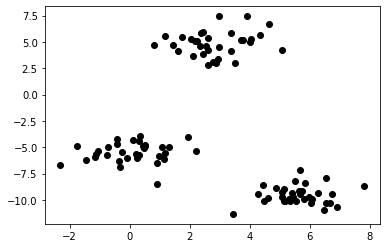

In [2]:
# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データ取得のためのインポート
from sklearn.datasets import make_blobs

# サンプルデータ生成
# 注意：make_blobsは2つの値を返すため、一方は使用しない「 _ 」で受け取る
X, _ = make_blobs(random_state=10)
# print(X.min())
print(X)
print(_)
# グラフを描画
# colorのオプションで色付け
plt.scatter(X[:,0],X[:,1],color='black')

In [3]:
# KMeansクラスの初期化
kmeans = KMeans(init='random',n_clusters=3)

# クラスター分する
kmeans.fit(X)

# クラスター番号を付ける
y_pred = kmeans.predict(X)
print(y_pred)

[2 2 0 1 0 0 1 2 0 1 1 0 0 2 2 0 1 0 1 0 1 2 0 2 1 0 0 0 0 1 2 0 0 1 2 2 2
 0 0 0 2 1 2 2 0 1 1 1 2 1 0 2 1 1 2 1 0 2 1 1 0 0 2 2 2 1 1 2 2 2 0 1 0 0
 2 0 0 2 1 1 1 0 1 0 2 0 2 1 2 2 1 1 1 2 2 2 0 1 1 1]


In [4]:
# concatでデータを横に結合(axis=1を指定)
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)

# 上記のデータにて、X軸をfeature1、Y軸をfeature2、クラスター番号をclusterと列名指定
merge_data.columns = ['feature1','feature2','cluster']
merge_data.head()

,feature1,feature2,cluster
0,-2.324963,-6.699996,2
1,0.518568,-4.900868,2
2,2.443018,3.846526,0
3,5.826623,-9.922593,1
4,2.033002,5.289908,0


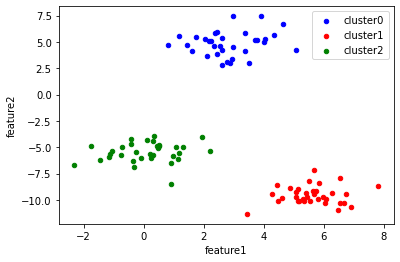

In [5]:
# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i],
                                           label=f'cluster{i}', ax=ax)

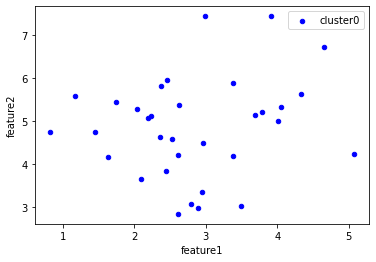

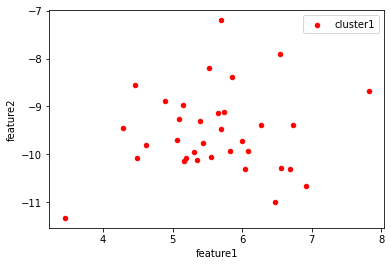

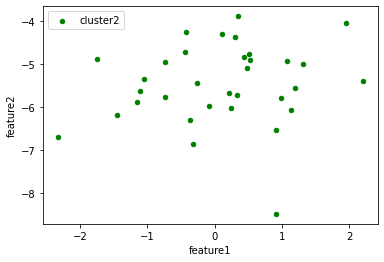

In [6]:
# クラスタリング結果のグラフ化
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    data.plot.scatter(x='feature1', y='feature2', color=colors[i],
                                           label=f'cluster{i}')